In [1]:
import networkx as nx
import math
from aux_functions import *

n = 20                   # number of cities
quota = 35

G = nx.complete_graph(n)  # graph with a vertex for each city

In [2]:
dataset = load_dataset('problems/symmetrics/att48.tsp')

print(dataset)

NameError: name 'load_dataset' is not defined

{0: Text(0.9675686188482339, 0.4823101554206558, '0'),
 1: Text(0.3368341750522692, 0.01694065572002379, '9'),
 2: Text(0.7096728835865967, 0.6059023835449338, '8'),
 3: Text(0.2050839422806514, 0.9234228600313905, '10'),
 4: Text(0.684054859181654, 0.6218514908629106, '1'),
 5: Text(0.5115711721014199, 0.7822153395287492, '7'),
 6: Text(0.8818899652535289, 0.08754556031507832, '2'),
 7: Text(0.707326826139183, 0.22554552103626158, '3'),
 8: Text(0.9858638218957296, 0.851714961623652, '3'),
 9: Text(0.4331385150144974, 0.025586730101486488, '2'),
 10: Text(0.20343187244054373, 0.7760163702708426, '8'),
 11: Text(0.4454244318989544, 0.14460382451328835, '10'),
 12: Text(0.09161469947344703, 0.7845720620008757, '7'),
 13: Text(0.08070587625809666, 0.6039341867201599, '4'),
 14: Text(0.07398670104330285, 0.3486557079656123, '1'),
 15: Text(0.04415878903477777, 0.21161172031598774, '4'),
 16: Text(0.4432174627872689, 0.9739998923592347, '7'),
 17: Text(0.9870075427530587, 0.121567310945717

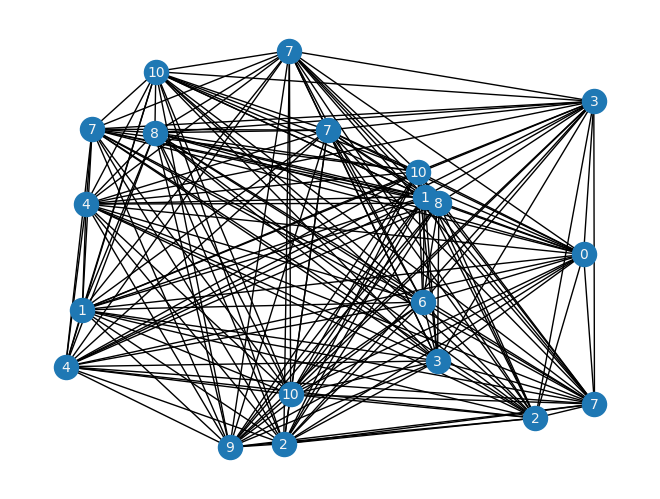

In [2]:
# for convenience, pick the city (x,y)-coordinates at random
import random

my_pos = { i : ( random.random(), random.random() ) for i in G.nodes }

bonus_label = {}

for i in G.nodes:
    if(i == 0):
        bonus_label[0] = 0
        G.nodes[i]['bonus'] = 0
        G.nodes[i]['penalty'] = 100000
    else:
        bonus = random.randint(1,10)
        bonus_label[i] = bonus
        G.nodes[i]['bonus'] = bonus
        G.nodes[i]['penalty'] = 0.3
    G.nodes[i]['id'] = i


nx.draw(G, pos=my_pos)
nx.draw_networkx_labels(G, my_pos, labels=bonus_label, font_size=10, font_color="whitesmoke")


In [3]:
for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)


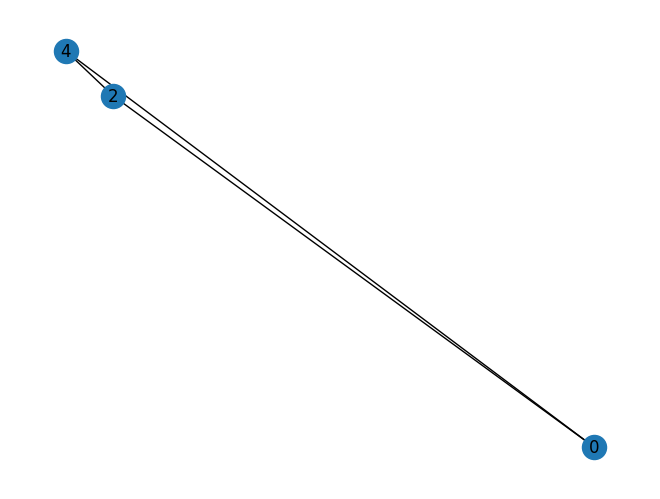

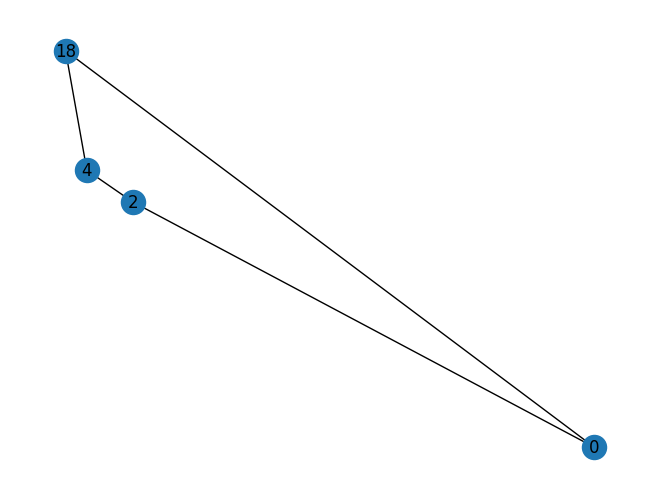

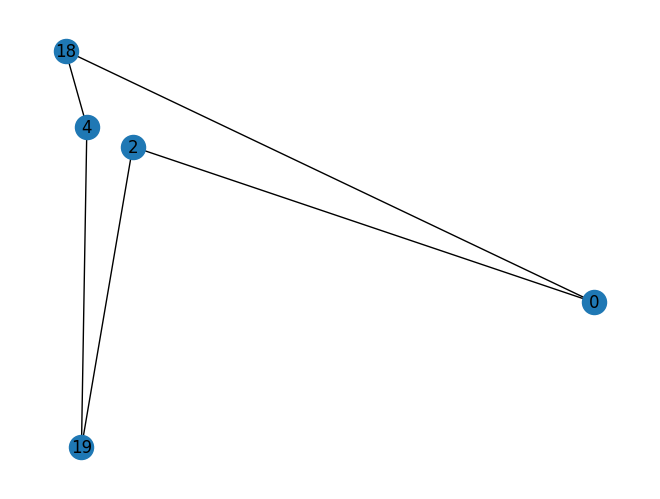

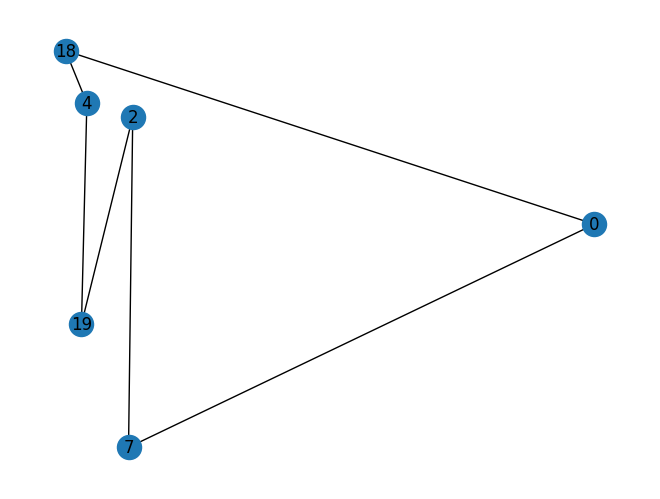

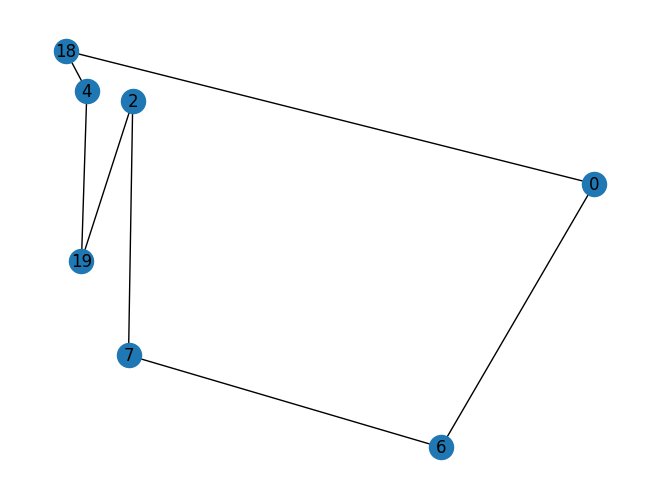

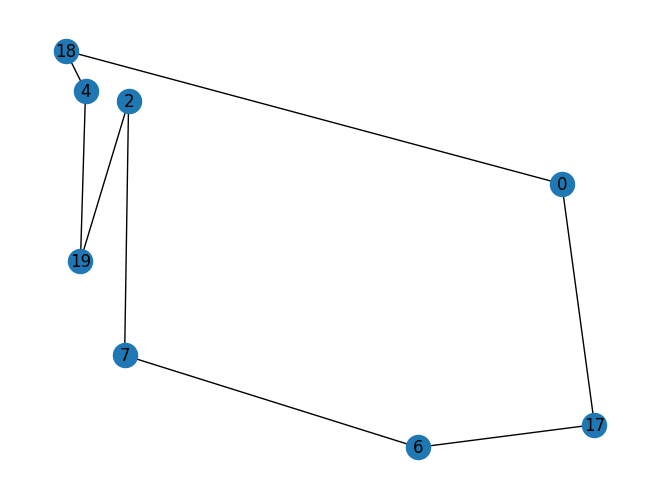

In [4]:
# ADD_step
import matplotlib.pyplot as plt


# find closest vertex from node 0
closest_vertex = 0
closest_distance = 10
for i,j in G.edges:
    if(i>0):
        break
    if G.edges[i,j]['length'] < closest_distance:
        closest_vertex = j
        closest_distance = G.edges[i,j]['length']
    
# init route
route = [G.nodes[0], G.nodes[closest_vertex]]

bonus_colected = calculate_bonus_colected(route, G)

# insert
while bonus_colected < quota:
    k_best_economy_value = -10
    k_best_economy = 0
    i_best_economy = 0
    j_best_economy = 0
    for k in range(len(G.nodes)):
        if G.nodes[k] not in route:
            for r in range(len(route)):
                if r < len(route) -1:
                    i = route[r]['id']
                    j = route[r + 1]['id']
                else:
                    i = route[r]['id']
                    j = route[0]['id']
                edge = G.edges[i,j]
                kEdge1 = G.edges[i,k]
                kEdge2 = G.edges[k,j]
                k_economy_value = edge['length'] + G.nodes[k]['penalty'] - kEdge1['length'] - kEdge2['length']
                if k_economy_value > k_best_economy_value:
                    k_best_economy_value = k_economy_value
                    i_best_economy = i
                    j_best_economy = j
                    k_best_economy = k
    bonus_colected = calculate_bonus_colected(route, G)
    if bonus_colected < quota and k_best_economy != 0:
        route.insert(i_best_economy + 1, G.nodes[k_best_economy])
    else:
        if k_best_economy_value <= 0:
            break
    plt.figure()
    route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]
    nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)


route_distance = calculate_route_distance(route, G)
route_penalties = calculate_penalties(route, G)
# route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]
# nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)



[{'bonus': 0, 'penalty': 100000, 'id': 0}, {'bonus': 10, 'penalty': 0.3, 'id': 18}, {'bonus': 1, 'penalty': 0.3, 'id': 4}, {'bonus': 6, 'penalty': 0.3, 'id': 19}, {'bonus': 8, 'penalty': 0.3, 'id': 2}, {'bonus': 3, 'penalty': 0.3, 'id': 7}, {'bonus': 2, 'penalty': 0.3, 'id': 6}, {'bonus': 7, 'penalty': 0.3, 'id': 17}]
{0: 0, 18: 10, 4: 1, 19: 6, 2: 8, 7: 3, 6: 2, 17: 7}
while
swapping  1  and  4
[{'bonus': 0, 'penalty': 100000, 'id': 0}, {'bonus': 6, 'penalty': 0.3, 'id': 19}, {'bonus': 1, 'penalty': 0.3, 'id': 4}, {'bonus': 10, 'penalty': 0.3, 'id': 18}, {'bonus': 8, 'penalty': 0.3, 'id': 2}, {'bonus': 3, 'penalty': 0.3, 'id': 7}, {'bonus': 2, 'penalty': 0.3, 'id': 6}, {'bonus': 7, 'penalty': 0.3, 'id': 17}]
{0: 0, 19: 6, 4: 1, 18: 10, 2: 8, 7: 3, 6: 2, 17: 7}
swapping  1  and  5
[{'bonus': 0, 'penalty': 100000, 'id': 0}, {'bonus': 8, 'penalty': 0.3, 'id': 2}, {'bonus': 10, 'penalty': 0.3, 'id': 18}, {'bonus': 1, 'penalty': 0.3, 'id': 4}, {'bonus': 6, 'penalty': 0.3, 'id': 19}, {'bonu

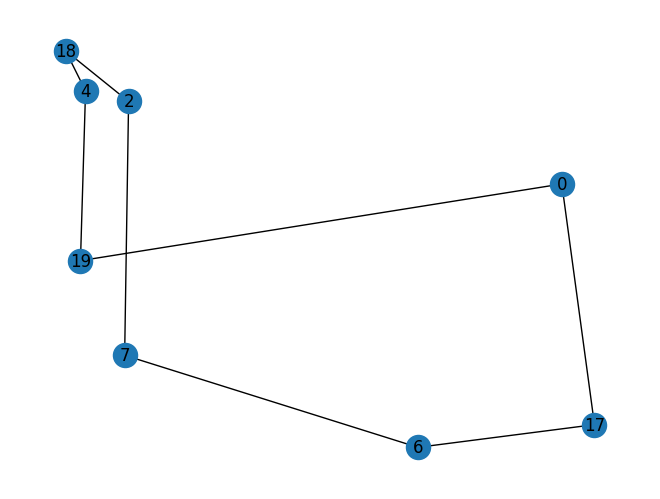

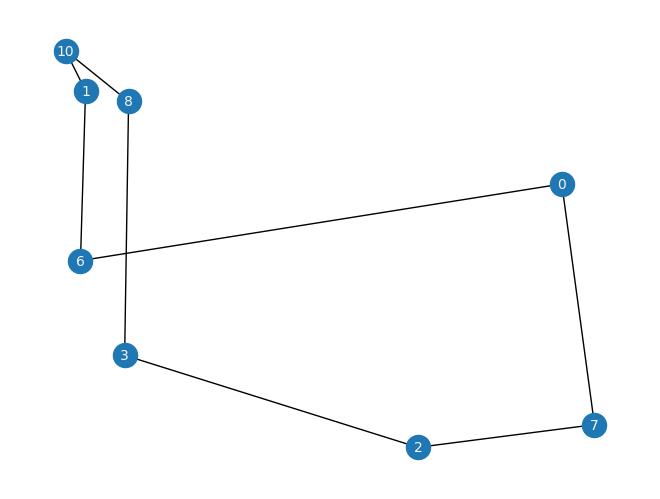

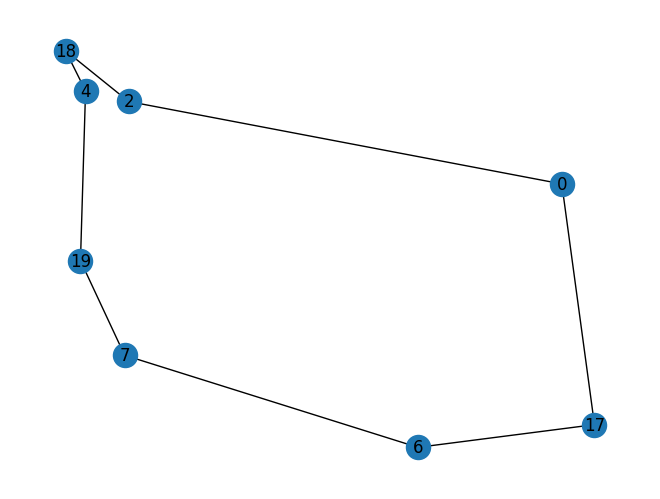

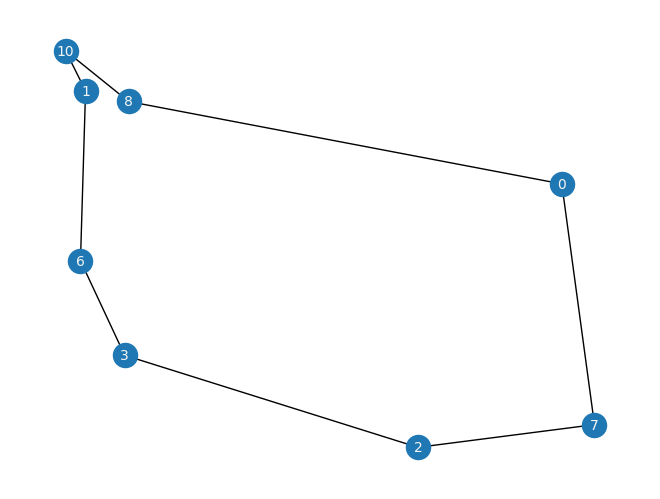

In [5]:
# 2-opt swap

cur_length = calculate_route_distance(route, G)

improved = True
bonus_label = bonus_labels(route)
print(route)
print(bonus_label)
print('while')
while improved:
    improved = False
    routeLen = len(route)
    for i in range(routeLen):
        for j in range(i+1,routeLen):
            
            
            new_route = swap_2_opt(i,j, route)
            new_length = calculate_route_distance(new_route, G)
            
            # update the route, if improved
            if new_length < cur_length:
                cur_length = new_length
                route = new_route
                improved = True
                bonus_label = bonus_labels(route)
                
                # draw the new tour
                route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]
                plt.figure() # call this to create a new figure, instead of drawing over the previous one(s)
                nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)
                plt.figure()
                nx.draw(G.edge_subgraph(route_edges), pos=my_pos)
                nx.draw_networkx_labels(G.edge_subgraph(route_edges),  pos=my_pos, labels=bonus_label, font_size=10, font_color="whitesmoke")